# Get the Tabular Data

In [2]:
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri

pandas2ri.activate()

# Load RDS file into pandas DataFrame
with robjects.conversion.localconverter(robjects.default_converter + pandas2ri.converter):
    df = robjects.r['readRDS']('O2_SingleSource.rds')

In [3]:
import pandas as pd

In [4]:
df.head()

,WE,TV,Online,Mobile,Print,Plakat,Radio,PERS_GEW,woche,Brand,alter
1:11,0.0,20.0,8.0,-1.0,0.0,0.0,1.0,160.0,KW 3/2016,PC_TKM_O2_,36.0
1:13,0.0,10.0,2.0,-1.0,0.0,0.0,3.0,45.0,KW 3/2016,PC_TKM_O2_,48.0
1:14,1.0,3.0,6.0,-1.0,0.0,0.0,3.0,75.0,KW 3/2016,PC_TKM_O2_,66.0
1:15,0.0,1.0,0.0,-1.0,0.0,0.0,4.0,15.0,KW 3/2016,PC_TKM_O2_,58.0
1:16,1.0,17.0,0.0,-1.0,0.0,0.0,3.0,82.0,KW 3/2016,PC_TKM_O2_,30.0


In [5]:
df_transformed = df.copy()

In [6]:
# Transforming the 'woche' column into a numeric (categorical) feature
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_transformed['woche'] = label_encoder.fit_transform(df_transformed['woche'])

In [7]:
# Transform the 'Brand' column into a numeric feature
df_transformed['Brand'] = label_encoder.fit_transform(df_transformed['Brand'])

In [8]:
df_transformed.head()

,WE,TV,Online,Mobile,Print,Plakat,Radio,PERS_GEW,woche,Brand,alter
1:11,0.0,20.0,8.0,-1.0,0.0,0.0,1.0,160.0,40,0,36.0
1:13,0.0,10.0,2.0,-1.0,0.0,0.0,3.0,45.0,40,0,48.0
1:14,1.0,3.0,6.0,-1.0,0.0,0.0,3.0,75.0,40,0,66.0
1:15,0.0,1.0,0.0,-1.0,0.0,0.0,4.0,15.0,40,0,58.0
1:16,1.0,17.0,0.0,-1.0,0.0,0.0,3.0,82.0,40,0,30.0


In [9]:
# Standardize columns
from sklearn.preprocessing import StandardScaler

features_to_standardize = ['TV', 'Online', 'Mobile', 'Online', 'Print', 'Plakat',
                            'Radio', 'PERS_GEW', 'alter']
scaler = StandardScaler()

df_transformed[features_to_standardize] = scaler.fit_transform(df_transformed[features_to_standardize])


In [10]:
df_transformed['Brand'].unique()

array([0])

In [11]:
df_transformed.drop(columns=['Brand'], inplace=True)

In [12]:
df_transformed.head()

,WE,TV,Online,Mobile,Print,Plakat,Radio,PERS_GEW,woche,alter
1:11,0.0,-0.133240,-0.151517,-0.403829,-1.314041,-0.272767,-0.401543,0.637758,40,0.266650
1:13,0.0,-0.348140,-0.338975,-0.403829,-1.314041,-0.272767,-0.327585,-0.589323,40,0.992763
1:14,1.0,-0.498571,-0.214003,-0.403829,-1.314041,-0.272767,-0.327585,-0.269215,40,2.081934
1:15,0.0,-0.541551,-0.401462,-0.403829,-1.314041,-0.272767,-0.290606,-0.909431,40,1.597858
1:16,1.0,-0.197710,-0.401462,-0.403829,-1.314041,-0.272767,-0.327585,-0.194523,40,-0.096407


In [13]:
# Check the NaN values
nan_columns = df_transformed.columns[df_transformed.isna().any()].tolist()

if len(nan_columns) == 0:
    print("There are no NaN values in any column.")
else:
    for column in nan_columns:
        print(f"Column '{column}' has {df[column].isna().sum()} NaN values.")

There are no NaN values in any column.


# Transform the Tabular Data into PyTorch Tensors

In [14]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

In [15]:
features = df_transformed.iloc[:,1:]
labels = df_transformed.iloc[:,0]

In [16]:
names = []
for col_names in features:
  names.append(col_names)

len(names)

9

In [17]:
features.head()

,TV,Online,Mobile,Print,Plakat,Radio,PERS_GEW,woche,alter
1:11,-0.133240,-0.151517,-0.403829,-1.314041,-0.272767,-0.401543,0.637758,40,0.266650
1:13,-0.348140,-0.338975,-0.403829,-1.314041,-0.272767,-0.327585,-0.589323,40,0.992763
1:14,-0.498571,-0.214003,-0.403829,-1.314041,-0.272767,-0.327585,-0.269215,40,2.081934
1:15,-0.541551,-0.401462,-0.403829,-1.314041,-0.272767,-0.290606,-0.909431,40,1.597858
1:16,-0.197710,-0.401462,-0.403829,-1.314041,-0.272767,-0.327585,-0.194523,40,-0.096407


In [18]:
labels

1:11       0.0
1:13       0.0
1:14       1.0
1:15       0.0
1:16       1.0
          ... 
2:36200    0.0
2:36201    0.0
2:36202    1.0
2:36203    0.0
2:36204    0.0
Name: WE, Length: 51507, dtype: float64

In [19]:
labels.values

array([0., 0., 1., ..., 1., 0., 0.])

In [20]:
import numpy as np

In [21]:
arr_feature = features.values
arr_feature = np.array(arr_feature)

arr_label = labels.values
arr_label = np.array(arr_label)

In [22]:
type(arr_feature), type(arr_label)

(numpy.ndarray, numpy.ndarray)

In [23]:
# Resampling
from imblearn.over_sampling import SMOTE
from collections import Counter

feature_resampled, label_resampled = SMOTE().fit_resample(arr_feature, arr_label)

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature_resampled,
                                                    label_resampled,
                                                    test_size=0.20,
                                                    random_state=42)

In [25]:
print(f"Shape of the training set\n Feature:{X_train.shape}, Label:{y_train.shape} \n")
print(f"Shape of the test set\n Feature:{X_test.shape}, Label:{y_test.shape}")

Shape of the training set
 Feature:(61369, 9), Label:(61369,) 

Shape of the test set
 Feature:(15343, 9), Label:(15343,)


In [26]:
type(X_train), type(X_test), type,(y_train), type(y_test)

(numpy.ndarray,
 numpy.ndarray,
 type,
 array([0., 0., 0., ..., 1., 1., 1.]),
 numpy.ndarray)

In [27]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [28]:
print(type(X_train_tensor))
print(type(X_test_tensor))
print(type(y_train_tensor))
print(type(y_test_tensor))

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [29]:
train_features = X_train_tensor
train_labels = y_train_tensor
test_features = X_test_tensor
test_labels = y_test_tensor

# Crafting an MLP Classifier

In [30]:
from torch import nn

In [31]:
from torch import nn
class MLP_Classifier(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Linear(input_shape, hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units, hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units, hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units, hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units, output_shape))

    def forward(self, x: torch.Tensor):
      return self.layer_stack(x)

In [32]:
# Instantiate the model
input_shape = 9
hidden_units = 10
output_shape = 1
model = MLP_Classifier(input_shape=input_shape, hidden_units=hidden_units, output_shape=output_shape)

In [33]:
# Define the loss function and optimizer
import torch.optim as optim
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Construction of the Training Loop

In [34]:
# Device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [35]:
model.to(device)

MLP_Classifier(
  (layer_stack): Sequential(
    (0): Linear(in_features=9, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=10, bias=True)
    (5): ReLU()
    (6): Linear(in_features=10, out_features=10, bias=True)
    (7): ReLU()
    (8): Linear(in_features=10, out_features=1, bias=True)
  )
)

In [36]:
from tqdm.auto import tqdm

train_losses = []
test_losses = []

epochs = 300

for epoch in tqdm(range(epochs)):
    # Train the model
    model.train()
    train_loss = 0.0
    optimizer.zero_grad()
    outputs = model(train_features.to(device))
    loss = criterion(outputs.squeeze(), train_labels.to(device))
    loss.backward()
    optimizer.step()
    train_loss += loss.item()

    # Evaluate the model on the test set
    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        outputs = model(test_features.to(device))
        test_loss += criterion(outputs.squeeze(), test_labels.to(device)).item()

    train_losses.append(train_loss)
    test_losses.append(test_loss)

    if epoch %10 == 0:
      print(f"Epoch {epoch}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")


  0%|          | 0/300 [00:00<?, ?it/s]

Epoch 0/300, Train Loss: 0.7755, Test Loss: 0.7576
Epoch 10/300, Train Loss: 0.6990, Test Loss: 0.6956
Epoch 20/300, Train Loss: 0.6927, Test Loss: 0.6926
Epoch 30/300, Train Loss: 0.6898, Test Loss: 0.6889
Epoch 40/300, Train Loss: 0.6877, Test Loss: 0.6864
Epoch 50/300, Train Loss: 0.6827, Test Loss: 0.6812
Epoch 60/300, Train Loss: 0.6744, Test Loss: 0.6728
Epoch 70/300, Train Loss: 0.6663, Test Loss: 0.6641
Epoch 80/300, Train Loss: 0.6566, Test Loss: 0.6541
Epoch 90/300, Train Loss: 0.6454, Test Loss: 0.6422
Epoch 100/300, Train Loss: 0.6332, Test Loss: 0.6293
Epoch 110/300, Train Loss: 0.6213, Test Loss: 0.6172
Epoch 120/300, Train Loss: 0.6093, Test Loss: 0.6051
Epoch 130/300, Train Loss: 0.5962, Test Loss: 0.5922
Epoch 140/300, Train Loss: 0.5811, Test Loss: 0.5768
Epoch 150/300, Train Loss: 0.5641, Test Loss: 0.5595
Epoch 160/300, Train Loss: 0.5449, Test Loss: 0.5400
Epoch 170/300, Train Loss: 0.5115, Test Loss: 0.5050
Epoch 180/300, Train Loss: 0.4989, Test Loss: 0.4948
Epoc

# Evaluation of the Model

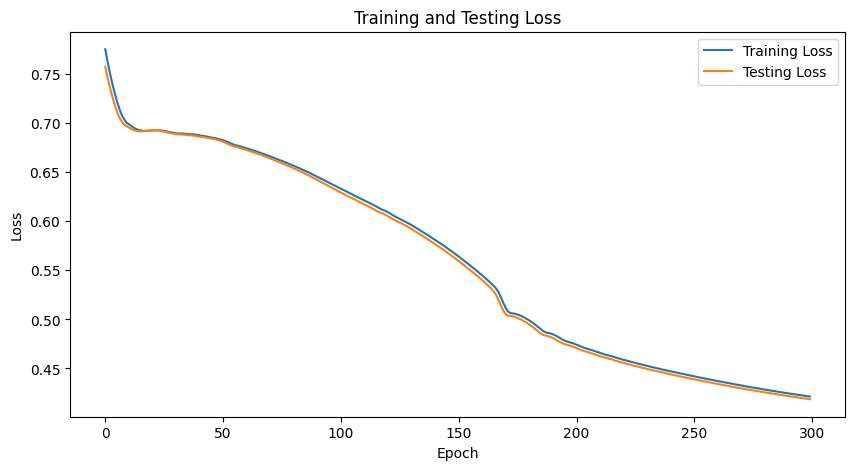

In [37]:
# Visualize the training and testing loss
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()
plt.show()


In [38]:
# Classification report
from sklearn.metrics import classification_report
model.eval()
with torch.no_grad():
    outputs = model(test_features.to(device))
    predictions = torch.sigmoid(outputs.squeeze()).cpu().numpy()
    y_pred = (predictions > 0.5).astype(int)
    print(classification_report(test_labels.cpu().numpy(), y_pred))


              precision    recall  f1-score   support

         0.0       0.94      0.65      0.77      7566
         1.0       0.74      0.96      0.83      7777

    accuracy                           0.81     15343
   macro avg       0.84      0.81      0.80     15343
weighted avg       0.84      0.81      0.80     15343

